In [97]:
import networkx as nx
import numpy as np
from itertools import combinations

In [92]:
def ErdosRenyi(N: int, L: int) -> nx.Graph:
    """ ErdosRenyi function generate a graph that contains N
    nodes which are connected with L randomly placed links.
    
    Args:
        N (int): Number of nodes.
        L (int): Number of links to place on the graph.

    Returns:
        nx.Graph: Erdos Renyi random graph (N,L)
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    if N == 1:
        """ If only one node then no lines could be created"""
        return G
    
    max_edges = N * (N - 1) / 2
    if L >= max_edges:
        """ Return complete graph"""
        G.add_edges_from(
            [[n1, n2] for n1 in range(N) for n2 in range(N)]
        )
        return G
    
    no_edges = 0
    while(no_edges < L):
        n1, n2 = np.random.choice(N, size=2, replace=False)
        if not G.has_edge(n1, n2):
            G.add_edge(n1, n2)
            no_edges += 1
    return G

In [109]:
def Gilbert(N: int, p: float) -> nx.Graph:
    """ Think about speeding up, using different algorithm
    for small p
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for v, w in combinations(G.nodes(), 2):
        prob = np.random.random()
        if prob > p:
            G.add_edge(v, w)
    return G

In [133]:
def WattsStrogatz(N: int, k: int, b: float) -> nx.Graph:
    G = nx.Graph()
    nodes = list(range(N))
    for j in range(1, k // 2 + 1):
        print(j)
        neighbours = nodes[j:] + nodes[0:j]
        G.add_edges_from(zip(nodes, neighbours))
    return G

1
2


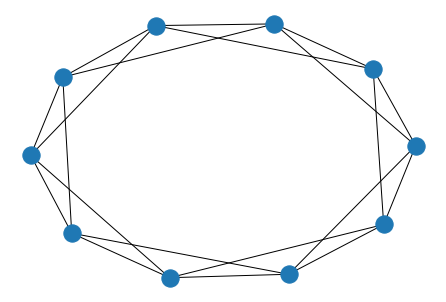

In [137]:
G = WattsStrogatz(10, 4, 0.1)
nx.draw(G)